<a href="https://colab.research.google.com/github/monmon2003/PyTorch/blob/main/pytorch_classification_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


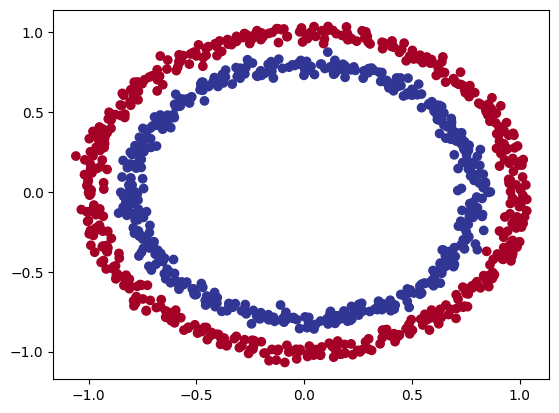

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y, cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset, a dataset small enough to run experiments

#1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Sahpes for one sample of X: {X_sample.shape}  and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Sahpes for one sample of X: (2,)  and the same for y: ()


###1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


### 2. Building a model

1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Creating the model

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature

  # define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# Instantiate an instance of our model class and send it to the target device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate  the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # requires the outputs to already go through softmax layer
loss_fn = nn.BCEWithLogitsLoss() # has built-in sigmoid activation function

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# Calulate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### 3. Training the model

1. Forward pass
2. calculate the loss
3. Opyimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmid for binary classification and softmax for multiclass classification).

Then we convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax()

In [ ]:
# View the first 5 outputs of the forward pass on the test data

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:


*   `y_pred_probs >= 0.5, y=1)` (class 1)
*   `y_pred_probs < 0.5, y=0)` (class 0)



In [ ]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2  Building a training and test loop

In [ ]:
torch.cuda.manual_seed(42)
epochs = 100
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range (epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")


Epoch: 0 | Loss: 0.6979604959487915 | Accuracy: 51.87500000000001 | Test Loss: 0.6943961381912231 | Test Accuracy: 57.99999999999999
Epoch: 10 | Loss: 0.6958983540534973 | Accuracy: 51.24999999999999 | Test Loss: 0.6930527091026306 | Test Accuracy: 53.0
Epoch: 20 | Loss: 0.6949015855789185 | Accuracy: 51.625 | Test Loss: 0.692543625831604 | Test Accuracy: 49.5
Epoch: 30 | Loss: 0.6943498253822327 | Accuracy: 51.125 | Test Loss: 0.6923598051071167 | Test Accuracy: 49.5
Epoch: 40 | Loss: 0.6940092444419861 | Accuracy: 50.875 | Test Loss: 0.6923156380653381 | Test Accuracy: 51.0
Epoch: 50 | Loss: 0.6937821507453918 | Accuracy: 50.24999999999999 | Test Loss: 0.6923370361328125 | Test Accuracy: 50.0
Epoch: 60 | Loss: 0.6936231851577759 | Accuracy: 50.0 | Test Loss: 0.6923912763595581 | Test Accuracy: 51.5
Epoch: 70 | Loss: 0.6935079097747803 | Accuracy: 50.24999999999999 | Test Loss: 0.6924624443054199 | Test Accuracy: 51.0
Epoch: 80 | Loss: 0.6934223175048828 | Accuracy: 49.875 | Test Loss

## 4. Make predictions and evaluate the model

from the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual

To do so, we're going to import a function called `plot_decision_boundary()` - "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


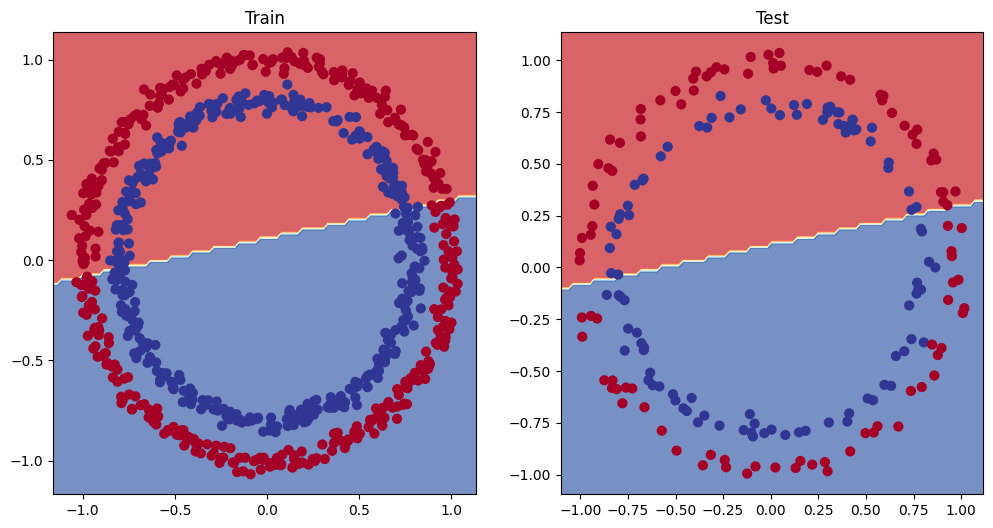

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving a model (from a model perspective)



*   Add more layers - give the model more chances to learn about patterns in the data
*   Add more hidden units - go from 5 hidden units to 10 hidden units
*   Fit for longer
*   Change the activation functions
*   Change the learning rate
*   Change the loss function



In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations speeds up the process

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs=1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

Epoch: 0 | Loss: 0.6971261501312256 | Accuracy: 50.0 | Test Loss: 0.6959357857704163 | Test Accuracy: 50.0
Epoch: 100 | Loss: 0.6932719349861145 | Accuracy: 49.625 | Test Loss: 0.6933419108390808 | Test Accuracy: 54.0
Epoch: 200 | Loss: 0.6931149363517761 | Accuracy: 49.875 | Test Loss: 0.6935668587684631 | Test Accuracy: 50.0
Epoch: 300 | Loss: 0.6930455565452576 | Accuracy: 50.625 | Test Loss: 0.6938425898551941 | Test Accuracy: 49.5
Epoch: 400 | Loss: 0.6930117607116699 | Accuracy: 50.5 | Test Loss: 0.6940736770629883 | Test Accuracy: 46.0
Epoch: 500 | Loss: 0.6929953098297119 | Accuracy: 51.0 | Test Loss: 0.6942493915557861 | Test Accuracy: 47.5
Epoch: 600 | Loss: 0.6929872632026672 | Accuracy: 51.5 | Test Loss: 0.6943777203559875 | Test Accuracy: 47.0
Epoch: 700 | Loss: 0.6929833889007568 | Accuracy: 50.875 | Test Loss: 0.6944693326950073 | Test Accuracy: 46.5
Epoch: 800 | Loss: 0.6929815411567688 | Accuracy: 51.0 | Test Loss: 0.6945338845252991 | Test Accuracy: 46.0
Epoch: 900 | 

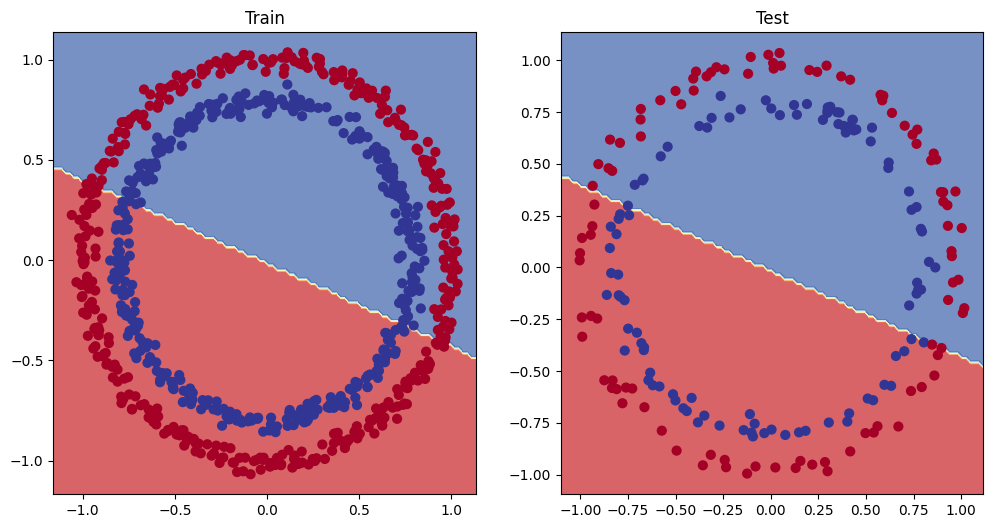

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot a larger problem is to test out a smaller problem.

In [ ]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

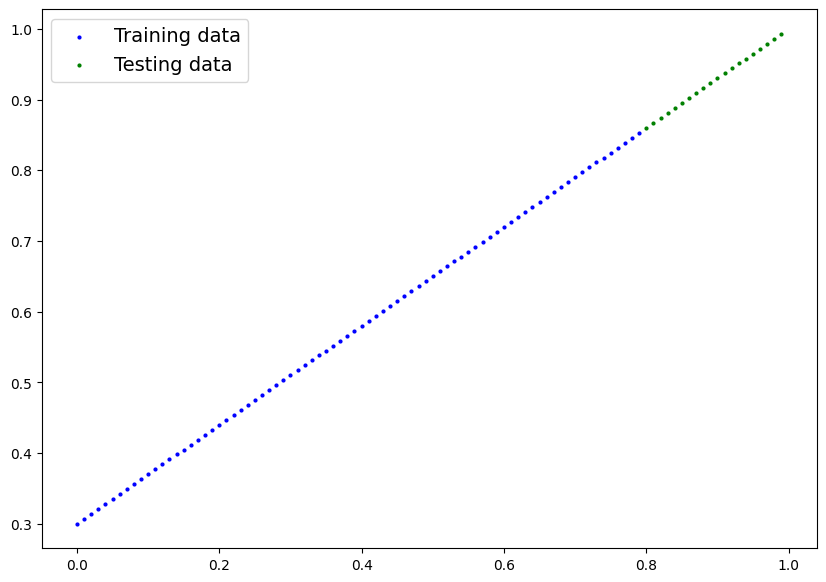

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  model_2.train()
  y_preds = model_2(X_train_regression)
  loss = loss_fn(y_preds, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_preds = model_2(X_test_regression)
    test_loss = loss_fn(test_preds, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

Epoch: 0 | loss: 0.7598585486412048 | test loss: 0.9110288619995117
Epoch: 100 | loss: 0.028579523786902428 | test loss: 0.0008127063629217446
Epoch: 200 | loss: 0.02532539702951908 | test loss: 0.0020921409595757723
Epoch: 300 | loss: 0.021374762058258057 | test loss: 0.0030510127544403076
Epoch: 400 | loss: 0.01964486762881279 | test loss: 0.003407776355743408
Epoch: 500 | loss: 0.019402215257287025 | test loss: 0.0038725852500647306
Epoch: 600 | loss: 0.019032424315810204 | test loss: 0.0037891955580562353
Epoch: 700 | loss: 0.018782908096909523 | test loss: 0.003813472343608737
Epoch: 800 | loss: 0.018397415056824684 | test loss: 0.0032875032629817724
Epoch: 900 | loss: 0.017980288714170456 | test loss: 0.003603896591812372


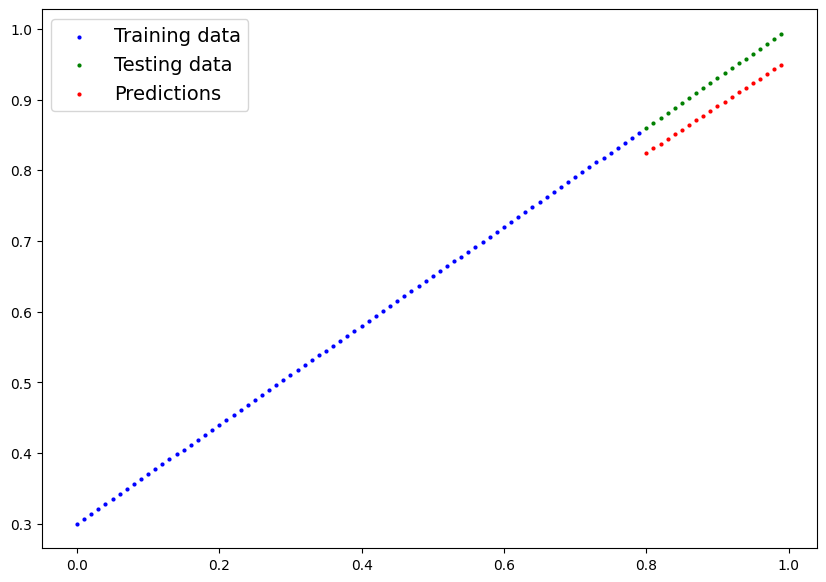

In [ ]:
model_2.eval()
with torch.inference_mode():
  preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.to("cpu"),
                 train_labels=y_train_regression.to("cpu"),
                 test_data=X_test_regression.to("cpu"),
                 test_labels=y_test_regression.to("cpu"),
                 predictions=preds.to("cpu"))


### 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in ML terms, an infinite (but really it is finite) to linear and non-linear functions

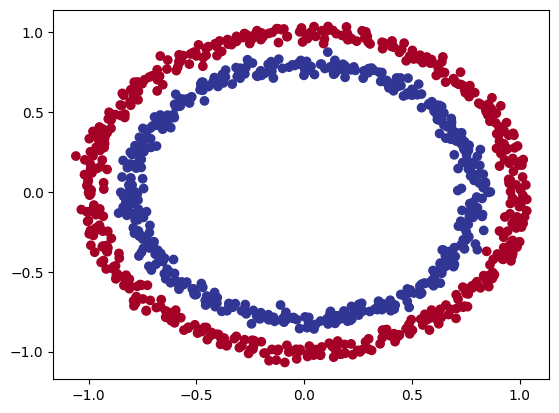

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 6.2 Building a model with non-linearity
* Linear = straight linear
* Non-linear = non-straight lines

In [ ]:
# Build a model with non-linear activation funtions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3



CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
epochs=2000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                    y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | accuracy: {acc} | test loss: {test_loss} | test accuracy: {test_acc}" )

Epoch: 0 | loss: 0.6929463148117065 | accuracy: 50.0 | test loss: 0.6931881308555603 | test accuracy: 50.0
Epoch: 100 | loss: 0.691152811050415 | accuracy: 52.87500000000001 | test loss: 0.6910240054130554 | test accuracy: 52.5
Epoch: 200 | loss: 0.6897744536399841 | accuracy: 53.37499999999999 | test loss: 0.6893961429595947 | test accuracy: 55.00000000000001
Epoch: 300 | loss: 0.6879494190216064 | accuracy: 53.0 | test loss: 0.6872316002845764 | test accuracy: 56.00000000000001
Epoch: 400 | loss: 0.6851678490638733 | accuracy: 52.75 | test loss: 0.6841148734092712 | test accuracy: 56.49999999999999
Epoch: 500 | loss: 0.6810224652290344 | accuracy: 52.75 | test loss: 0.6794120073318481 | test accuracy: 56.49999999999999
Epoch: 600 | loss: 0.675148606300354 | accuracy: 54.50000000000001 | test loss: 0.6728507876396179 | test accuracy: 56.00000000000001
Epoch: 700 | loss: 0.6665886640548706 | accuracy: 58.375 | test loss: 0.6632164716720581 | test accuracy: 59.0
Epoch: 800 | loss: 0.651

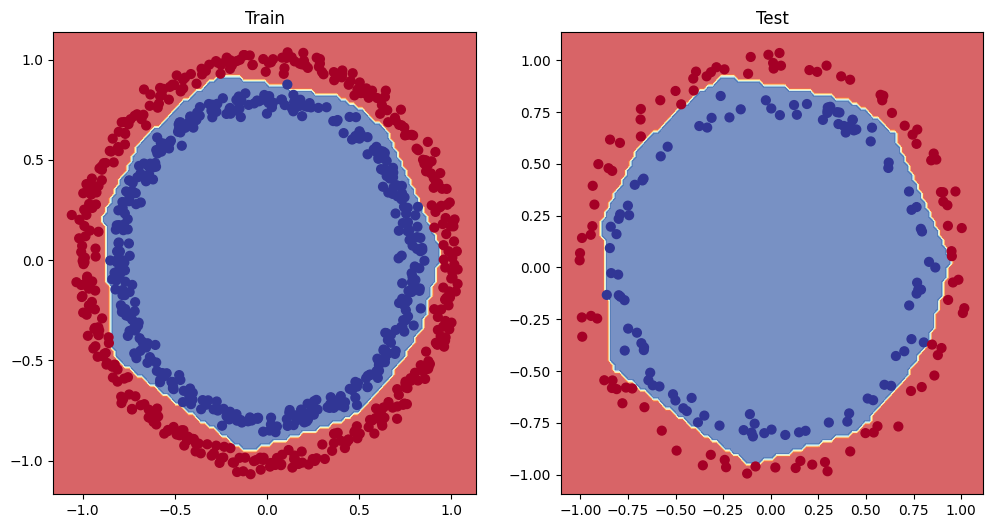

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

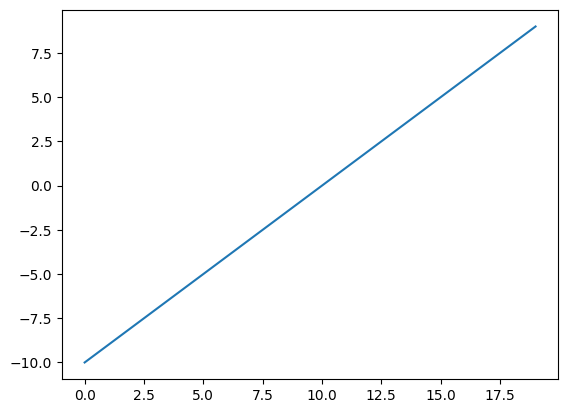

In [ ]:
plt.plot(A)

In [ ]:
def relu(A: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),A)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

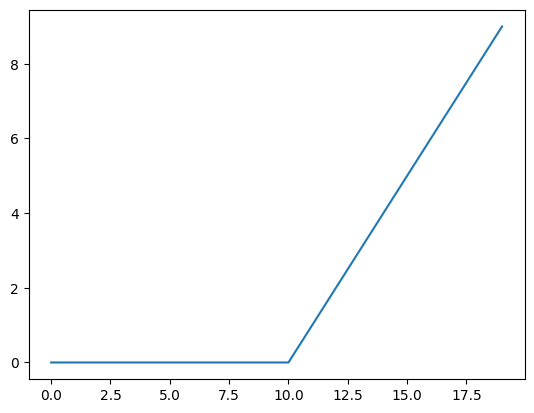

In [ ]:
plt.plot(relu(A))

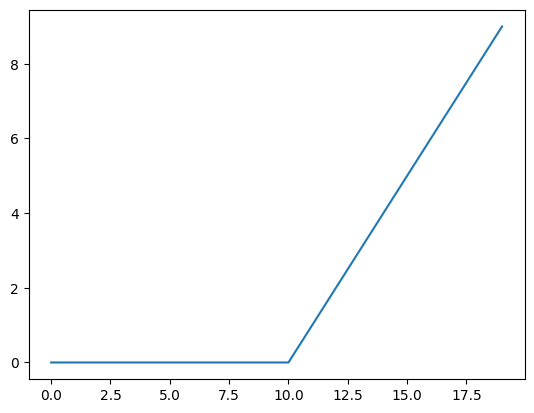

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def sigmoid(A: torch.Tensor) -> torch.Tensor:
  return 1/(1+torch.exp(-A))

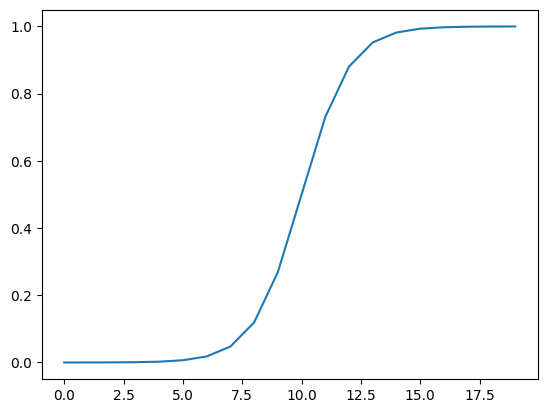

In [ ]:
plt.plot(sigmoid(A))

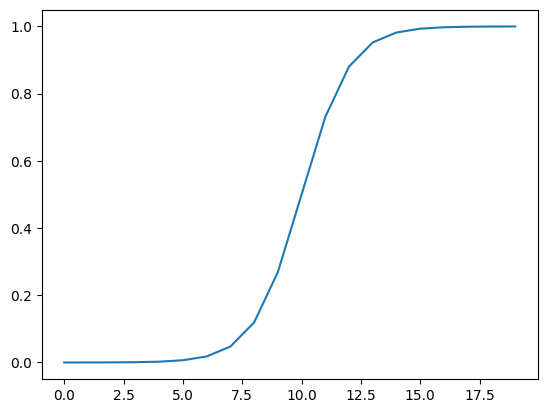

In [ ]:
plt.plot(torch.sigmoid(A))

### 8. Multiclass Classification

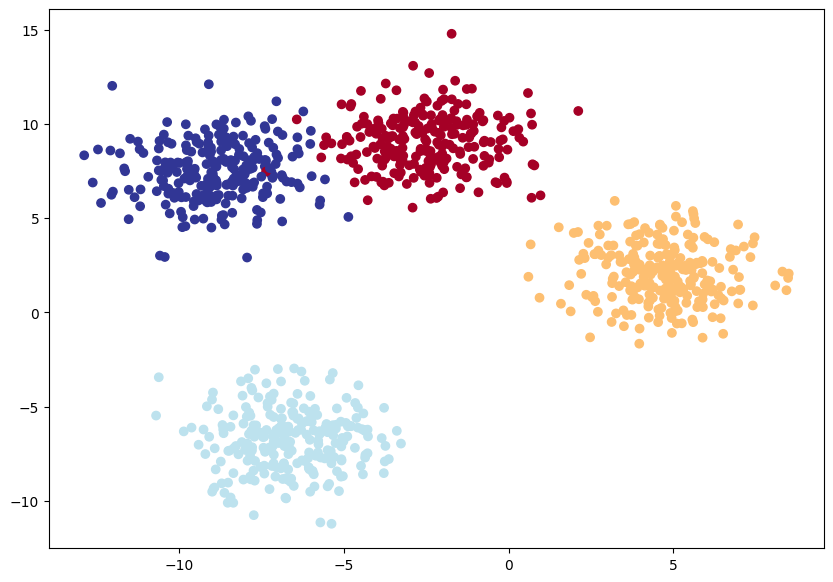

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multiclass classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model.
    Args:
    input_features (int): Number of input features to the model
    output_features (int): Number of output features (number of output classes)
    hidden_untis (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob)

tensor([0, 1, 2, 3])

In [ ]:
# Create a loss function for a multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification model
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


### 8.4 Getting prediction probabilities for a multiclass PyTorch model

In [ ]:
# let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
# y_logits

In [ ]:
# Convert our model's logit outputs to predicition probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# Conert our model's predictions into labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

### 8.5 Training and testing loop for multiclass-classifiction model

In [ ]:
epochs = 100
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

  optimizer.zero_grad()


  loss.backward()


  optimizer.step()


  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | accuracy: {acc} | test loss: {test_loss} | test accuracy: {test_acc}")



Epoch: 0 | loss: 1.1588265895843506 | accuracy: 40.375 | test loss: 1.0755419731140137 | test accuracy: 48.0
Epoch: 10 | loss: 0.6447554230690002 | accuracy: 96.75 | test loss: 0.6606872081756592 | test accuracy: 97.5
Epoch: 20 | loss: 0.42535150051116943 | accuracy: 98.5 | test loss: 0.43074119091033936 | test accuracy: 100.0
Epoch: 30 | loss: 0.2529423236846924 | accuracy: 99.125 | test loss: 0.24507619440555573 | test accuracy: 99.5
Epoch: 40 | loss: 0.11232151091098785 | accuracy: 99.25 | test loss: 0.10228516906499863 | test accuracy: 99.5
Epoch: 50 | loss: 0.06626511365175247 | accuracy: 99.25 | test loss: 0.058475375175476074 | test accuracy: 99.5
Epoch: 60 | loss: 0.05068015679717064 | accuracy: 99.25 | test loss: 0.042932283133268356 | test accuracy: 99.5
Epoch: 70 | loss: 0.042996764183044434 | accuracy: 99.25 | test loss: 0.03490966185927391 | test accuracy: 99.5
Epoch: 80 | loss: 0.038361385464668274 | accuracy: 99.25 | test loss: 0.029878225177526474 | test accuracy: 99.5


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_probs[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

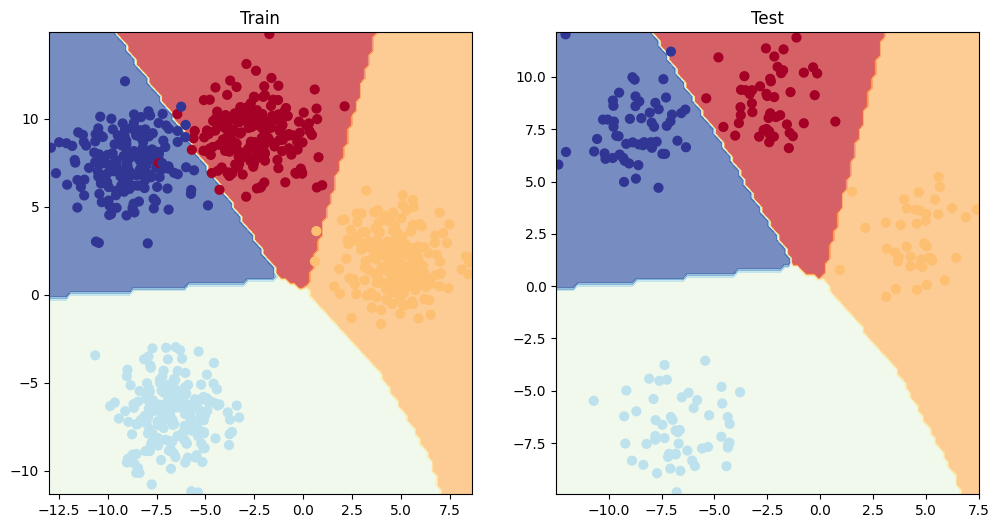

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train )
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 8.0 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)

# Calculate accuracy
torchmetric_accuracy(test_pred, y_blob_test)

tensor(0.9950, device='cuda:0')